To run this locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/quick-start.html) and execute: `ploomber examples -n cookbook/nested-cv`

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=cookbook/nested-cv%20issue)

Questions? [Ask us on Slack.](https://ploomber.io/community/)


# Nested cross-validation

<!-- start description -->
Nested cross-validation for model selection and hyperparameter tuning.
<!-- end description -->

More details in our [blog.](https://ploomber.io/blog/nested-cv/)

```yaml
# Content of pipeline.yaml
executor: parallel

tasks:
  - source: tasks/load.py
    product:
      nb: products/load.html
      data: products/data.csv

  - source: tasks/fit.py
    name: fit-
    product:
      nb: products/fit.html
      model: products/model.pkl
    grid:
      - model: sklearn.ensemble.RandomForestClassifier
        model_params:
          # optimize over these parameters
          - n_estimators: [2, 5]
            criterion: [gini, entropy]
    
      - model: sklearn.svm.SVC
        model_params:
          # optimize over these parameters
          - kernel: [linear, poly]
            C: [0.1, 1.0]
      
      

```

Plot:

In [1]:
%%sh
ploomber plot

Loading pipeline...
Plot saved at: pipeline.html


100%|██████████| 3/3 [00:00<00:00, 3416.48it/s]


Display the pipeline:

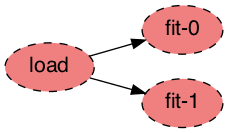

In [2]:
from IPython.display import Image
Image('pipeline.png')
# NOTE: ploomber plot will generate a pipeline.html (not .png) file if
# pygraphviz is missing. In such case, open the file to view the pipeline plot

Run the pipeline:

In [3]:
%%sh
# run this in a terminal
ploomber build

Loading pipeline...
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: {'load'}
Remaining tasks: {'fit-1', 'fit-0'}
Finished 1 out of 3 tasks
Finished tasks so far: {'load'}
Remaining tasks: {'fit-1', 'fit-0'}
Finished 1 out of 3 tasks
Finished tasks so far: {'load'}
Remaining tasks: {'fit-1', 'fit-0'}
Finished 1 out of 3 tasks
Finished tasks so far: {'load'}
Remaining tasks: {'fit-1', 'fit-0'}
Finished 1 out of 3 tasks
Finished tasks so far: {'load', 'fit-0'}
Remaining tasks: {'fit-1'}
Finished 2 out of 3 tasks
name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
load    True          3.48913       23.8055
fi

Executing: 100%|██████████| 14/14 [00:04<00:00,  3.33cell/s]
